### This script perform Seurat workflow on the 10x-Visium spatial sample dkd1

UMAP will be generated

Main Figure 1 and corresponding supplemental figures are generated

Author: Haojia Wu, Pierre Isnard, Dian Li

Contact: dianli@wustl.edu

Last updated: December 6, 2023

In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(reshape2)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 


Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked 

In [2]:
plots_path_main = "../../plots/version_1/main_figures"
plots_path_supp = "../../plots/version_1/supp_figures"
processed_data_path = "../../processed_data/version_1"

dir.create(plots_path_main, showWarnings = F, recursive = T)
dir.create(plots_path_supp, showWarnings = F, recursive = T)
dir.create(processed_data_path, showWarnings = F, recursive = T)

### Step 1. Load spatial data

In [3]:
dkd1 <- Load10X_Spatial(data.dir = "../../data/AJHM365_dkd/outs/")

### Step 2. Load meta data

In [4]:
load("../../meta/meta_info.RData")

In [5]:
anno <- read.csv("../../meta/Morph-based_v2.csv")

In [6]:
dim(anno)
head(anno)
table(anno$Morph.based)

[1] 2802    2

Barcode            Morph.based
1 AACACTTGGCAAGGAA-1 Tumor      
2 AACAGGATTCATAGTT-1 Glomeruli  
3 AACAGGTTATTGCACC-1 PT         
4 AACAGGTTCACCGAAG-1 LH-CD      
5 AACAGTCAGGCTCCGC-1 Other      
6 AACATCTTAAGGCTCA-1 Other


 Artery-C  Artery-K   Capsule    Cast-T Glomeruli    I-IFTA     Inj-T     LH-CD 
       19       108       138       350       345        94       345       649 
    Other        PT       TLS     Tumor 
      292       295         9       158 

### step 3. Add annotation to the Seurat object meta.data

In [7]:
meta_tmp = dkd1@meta.data
meta_tmp$Barcode = rownames(meta_tmp)
meta_tmp = left_join(meta_tmp, anno, by = "Barcode")
rownames(meta_tmp) = meta_tmp$Barcode

dkd1@meta.data = meta_tmp
head(dkd1@meta.data)

orig.ident    nCount_Spatial nFeature_Spatial
AACACTTGGCAAGGAA-1 SeuratProject 37726          9197            
AACAGGATTCATAGTT-1 SeuratProject 15426          6541            
AACAGGTTATTGCACC-1 SeuratProject 19244          7267            
AACAGGTTCACCGAAG-1 SeuratProject 24380          8180            
AACAGTCAGGCTCCGC-1 SeuratProject 22432          8043            
AACATCTTAAGGCTCA-1 SeuratProject 18935          7598            
                   Barcode            Morph.based
AACACTTGGCAAGGAA-1 AACACTTGGCAAGGAA-1 Tumor      
AACAGGATTCATAGTT-1 AACAGGATTCATAGTT-1 Glomeruli  
AACAGGTTATTGCACC-1 AACAGGTTATTGCACC-1 PT         
AACAGGTTCACCGAAG-1 AACAGGTTCACCGAAG-1 LH-CD      
AACAGTCAGGCTCCGC-1 AACAGTCAGGCTCCGC-1 Other      
AACATCTTAAGGCTCA-1 AACATCTTAAGGCTCA-1 Other

In [8]:
dkd1[["percent.mt"]] <- PercentageFeatureSet(object = dkd1, pattern = "^MT-")

### Step 3.2. Reorder levels

In [9]:
dkd1$Morph.based <- factor(dkd1$Morph.based, levels = names(color_palette))

### Step 4. Perform dimension reduction

In [10]:
# Until UMAP
dkd1 <- SCTransform(dkd1, assay = "Spatial", verbose = FALSE)
dkd1 <- RunPCA(dkd1, assay = "SCT", verbose = FALSE)
dkd1 <- FindNeighbors(dkd1, reduction = "pca", dims = 1:20)
dkd1 <- FindClusters(dkd1, verbose = FALSE, resolution = 0.8)
dkd1 <- RunUMAP(dkd1, reduction = "pca", dims = 1:20, min.dist = 0.1)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:07:23 UMAP embedding parameters a = 1.577 b = 0.8951

17:07:23 Read 2802 rows and found 20 numeric columns

17:07:23 Using Annoy for neighbor search, n_neighbors = 30

17:07:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:07:24 Writing NN index file to temp file /tmp/Rtmp3UBzgR/file3937ef5204f9

17:07:24 Searching Annoy index using 1 thread, search_k = 3000

17:07:24 Annoy recall = 100%

17:07:25 Commencing smooth kNN distance cali

### Step 4.2. Update coordinate to fit spatial plot functions

In [11]:
dkd1@images[["slice1"]]@coordinates[["tissue"]] <- as.numeric(dkd1@images[["slice1"]]@coordinates[["tissue"]])
dkd1@images[["slice1"]]@coordinates[["row"]] <- as.numeric(dkd1@images[["slice1"]]@coordinates[["row"]])
dkd1@images[["slice1"]]@coordinates[["col"]] <- as.numeric(dkd1@images[["slice1"]]@coordinates[["col"]])
dkd1@images[["slice1"]]@coordinates[["imagerow"]] <- as.numeric(dkd1@images[["slice1"]]@coordinates[["imagerow"]])
dkd1@images[["slice1"]]@coordinates[["imagecol"]] <- as.numeric(dkd1@images[["slice1"]]@coordinates[["imagecol"]])

### Step 4.3. Save object

In [12]:
Idents(dkd1) = dkd1$Morph.based

In [13]:
save(list = c("dkd1"), file = file.path(processed_data_path, "dkd1_umap.RData"), compress = T)

In [14]:
# custom_theme <- theme_minimal(base_family = "Helvetica") +
#                     theme(text = element_text(family = "Helvetica"))

custom_theme <- theme(text = element_text(family = "Helvetica"))

### Step 5. Visualization - UMAP

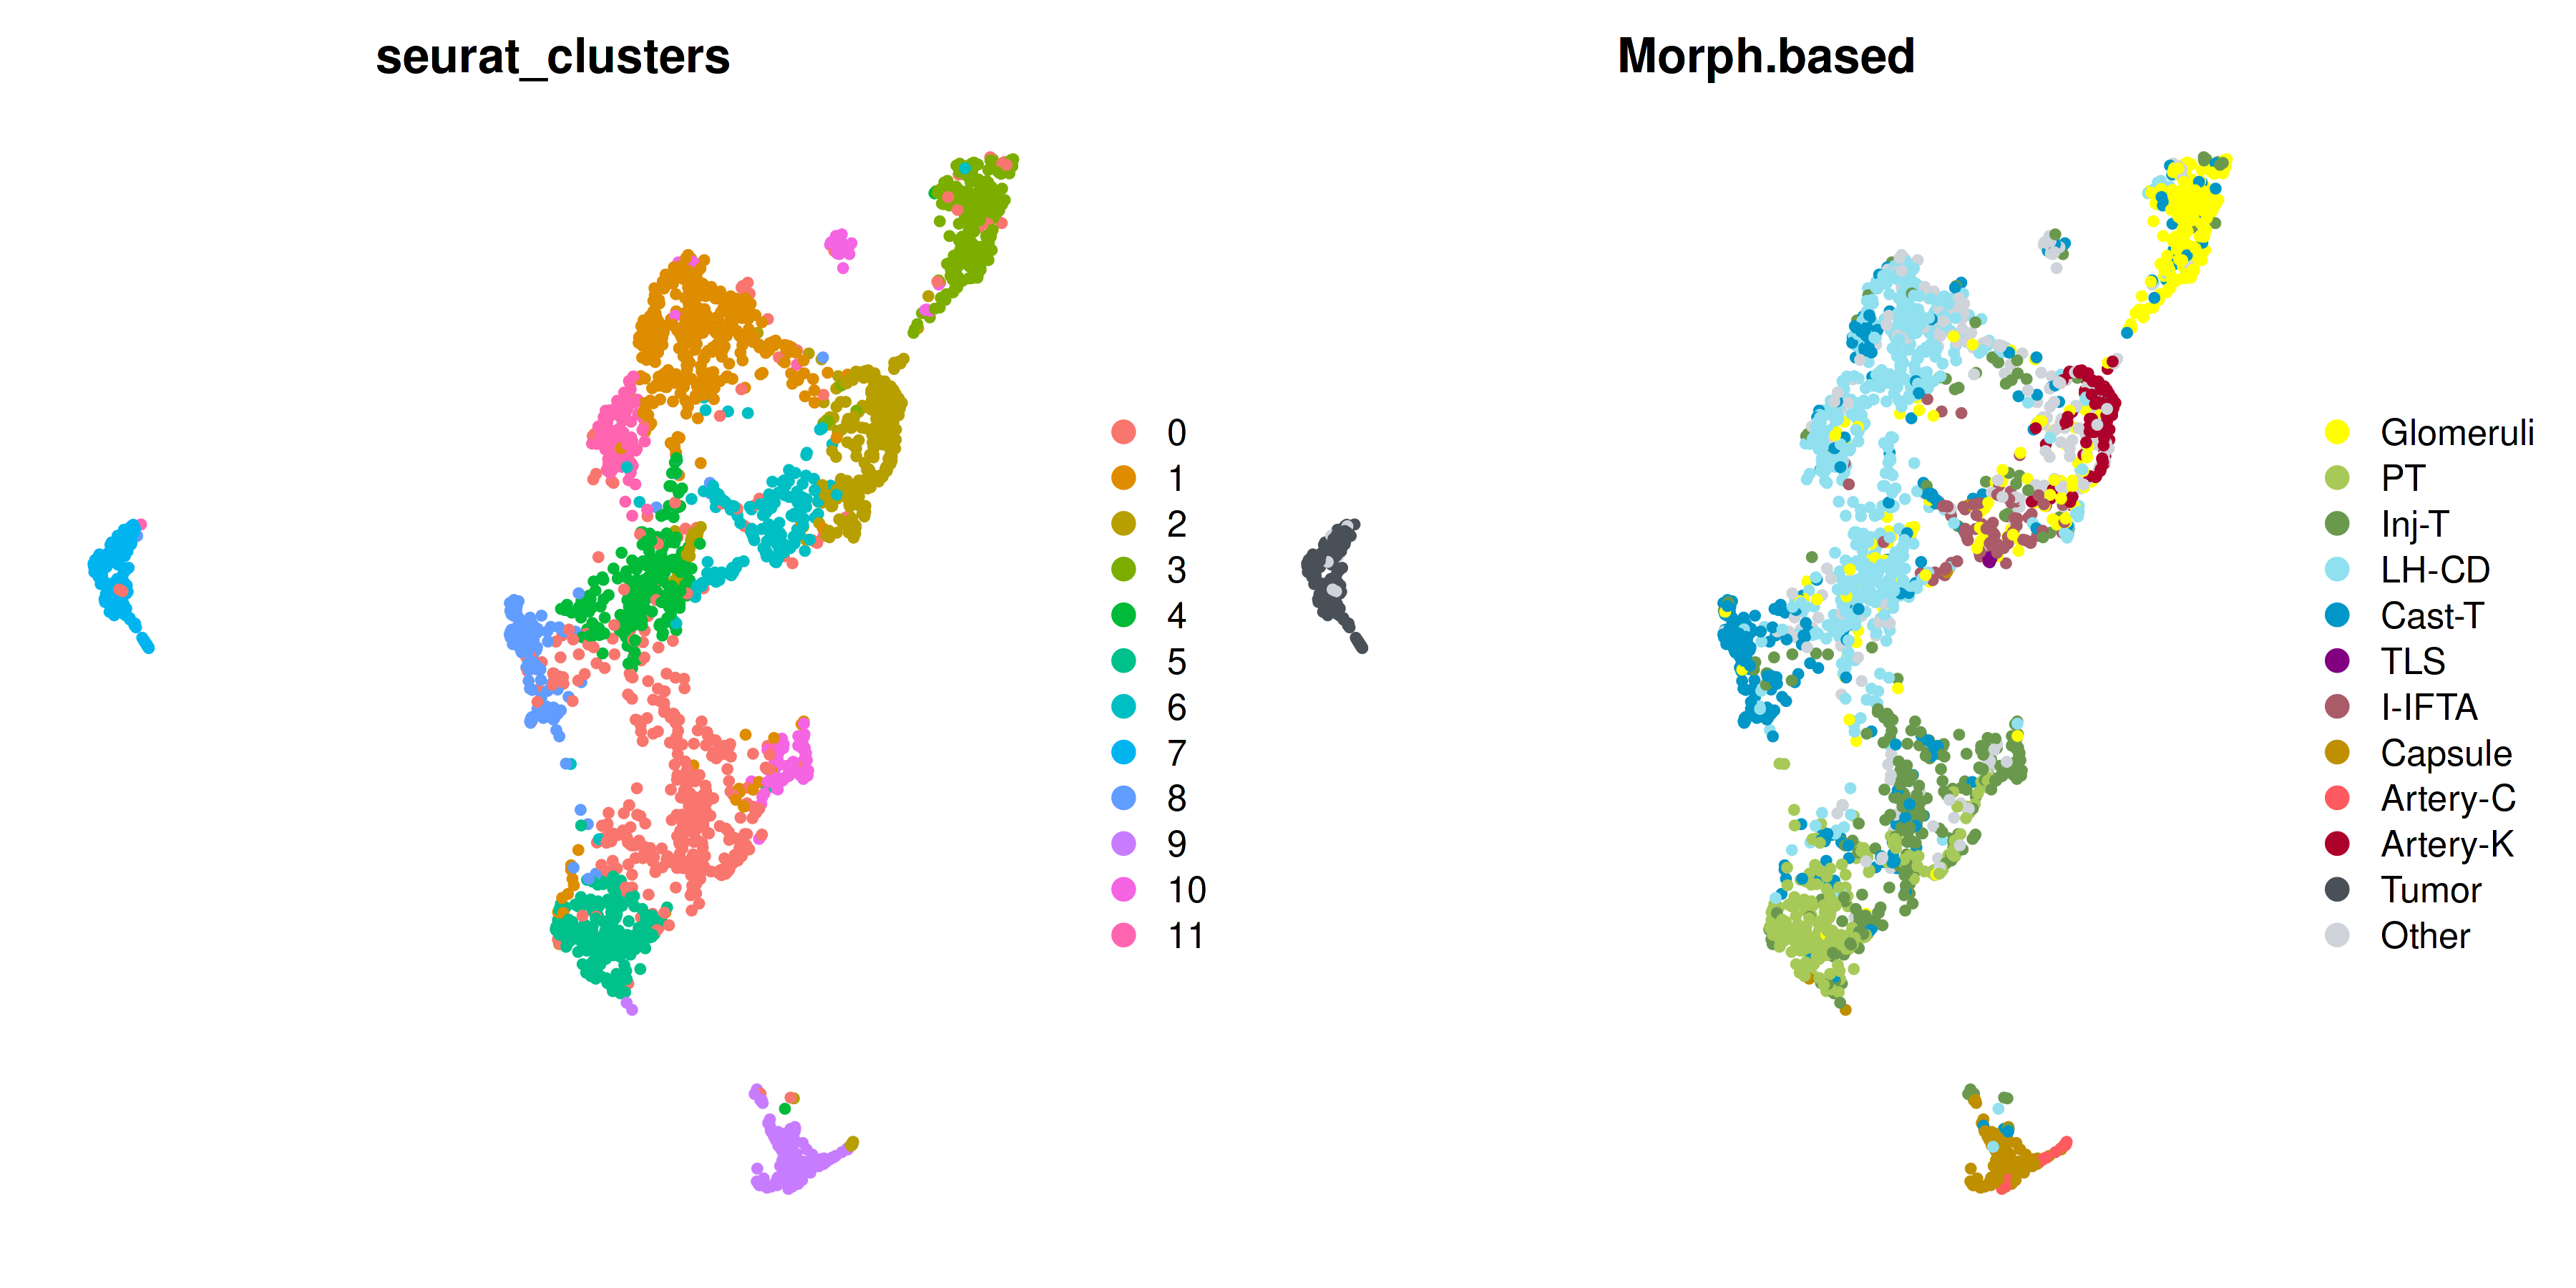

In [15]:
empty_theme = theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)
p1 = DimPlot(dkd1, group.by = "seurat_clusters", raster = FALSE, pt.size = 1) + empty_theme + custom_theme

Idents(dkd1) = "Morph.based"
p2 = DimPlot(dkd1, group.by = "Morph.based", cols = color_palette, raster = FALSE, pt.size = 1) + empty_theme + custom_theme

p1 | p2

p2 = p2 + theme(plot.title = element_blank())

ggsave(p2, filename = file.path(plots_path_main, "DimPlot_UMAP_Morph_based.png"), width = 6, height = 5, units = "in", dpi = 300)
ggsave(p2, filename = file.path(plots_path_main, "DimPlot_UMAP_Morph_based.pdf"), width = 6, height = 5, units = "in", dpi = 300)

ggsave(p1, filename = file.path(plots_path_supp, "DimPlot_UMAP_seurat_cluster.png"), width = 6, height = 5, units = "in", dpi = 300)
ggsave(p1, filename = file.path(plots_path_supp, "DimPlot_UMAP_seurat_cluster.pdf"), width = 6, height = 5, units = "in", dpi = 300)


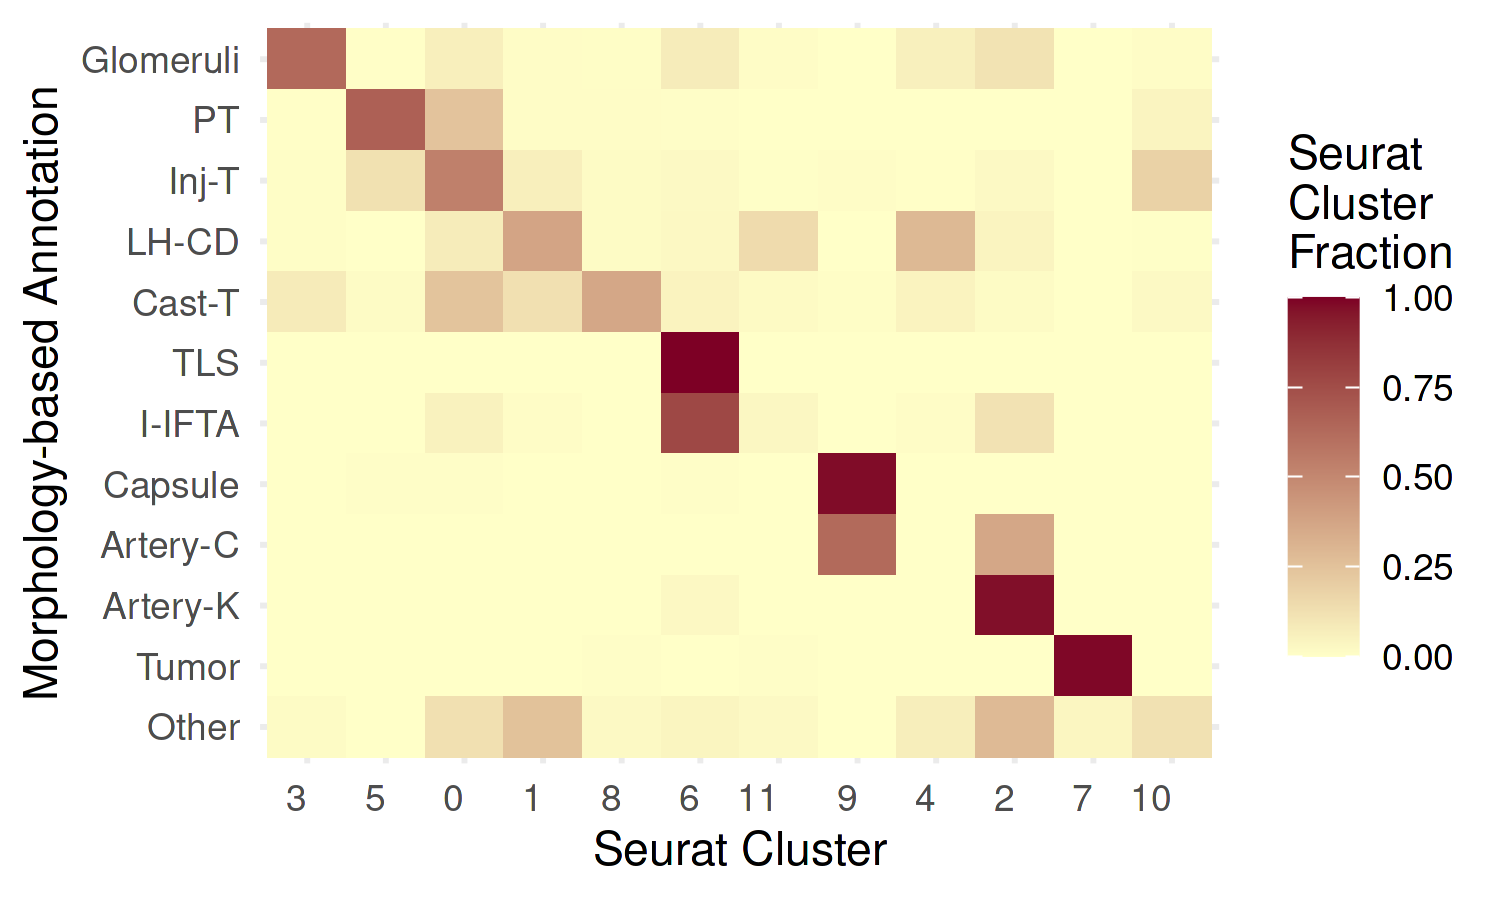

In [16]:
prediction <- table(dkd1$seurat_clusters, dkd1$Morph.based)
prediction <- t(t(prediction)/colSums(prediction))  # normalize for number of cells in each cell type

# Reorder rows manually
prediction_reordered <- prediction[
    c(4,6,1,2,9,7,
      12,10,5,3,8,11),

]

prediction_long <- melt(prediction_reordered)


prediction_long$Var1 = factor(x = prediction_long$Var1, levels = prediction_long$Var1[1:12])
prediction_long$Var2 <- factor(prediction_long$Var2, levels = rev(unique(prediction_long$Var2)))

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(prediction_long, aes(Var1, Var2, fill = value)) + 
    geom_tile() +
    scale_fill_gradient(name = "Seurat\nCluster\nFraction",low = "#ffffc8", high = "#7d0025") +

    theme_minimal() +
    labs(x = "Column", y = "Row", fill = "Value") +
    theme(axis.text.x = element_text(angle = 0, hjust = 1)) + 
    xlab("Seurat Cluster") + 
    ylab("Morphology-based Annotation") +
    custom_theme

p

ggsave(p, filename = file.path(plots_path_supp, "Heatmap_Morph_based_vs_Seurat_cluster.png"), width = 5, height = 3, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_supp, "Heatmap_Morph_based_vs_Seurat_cluster.pdf"), width = 5, height = 3, units = "in", dpi = 300)


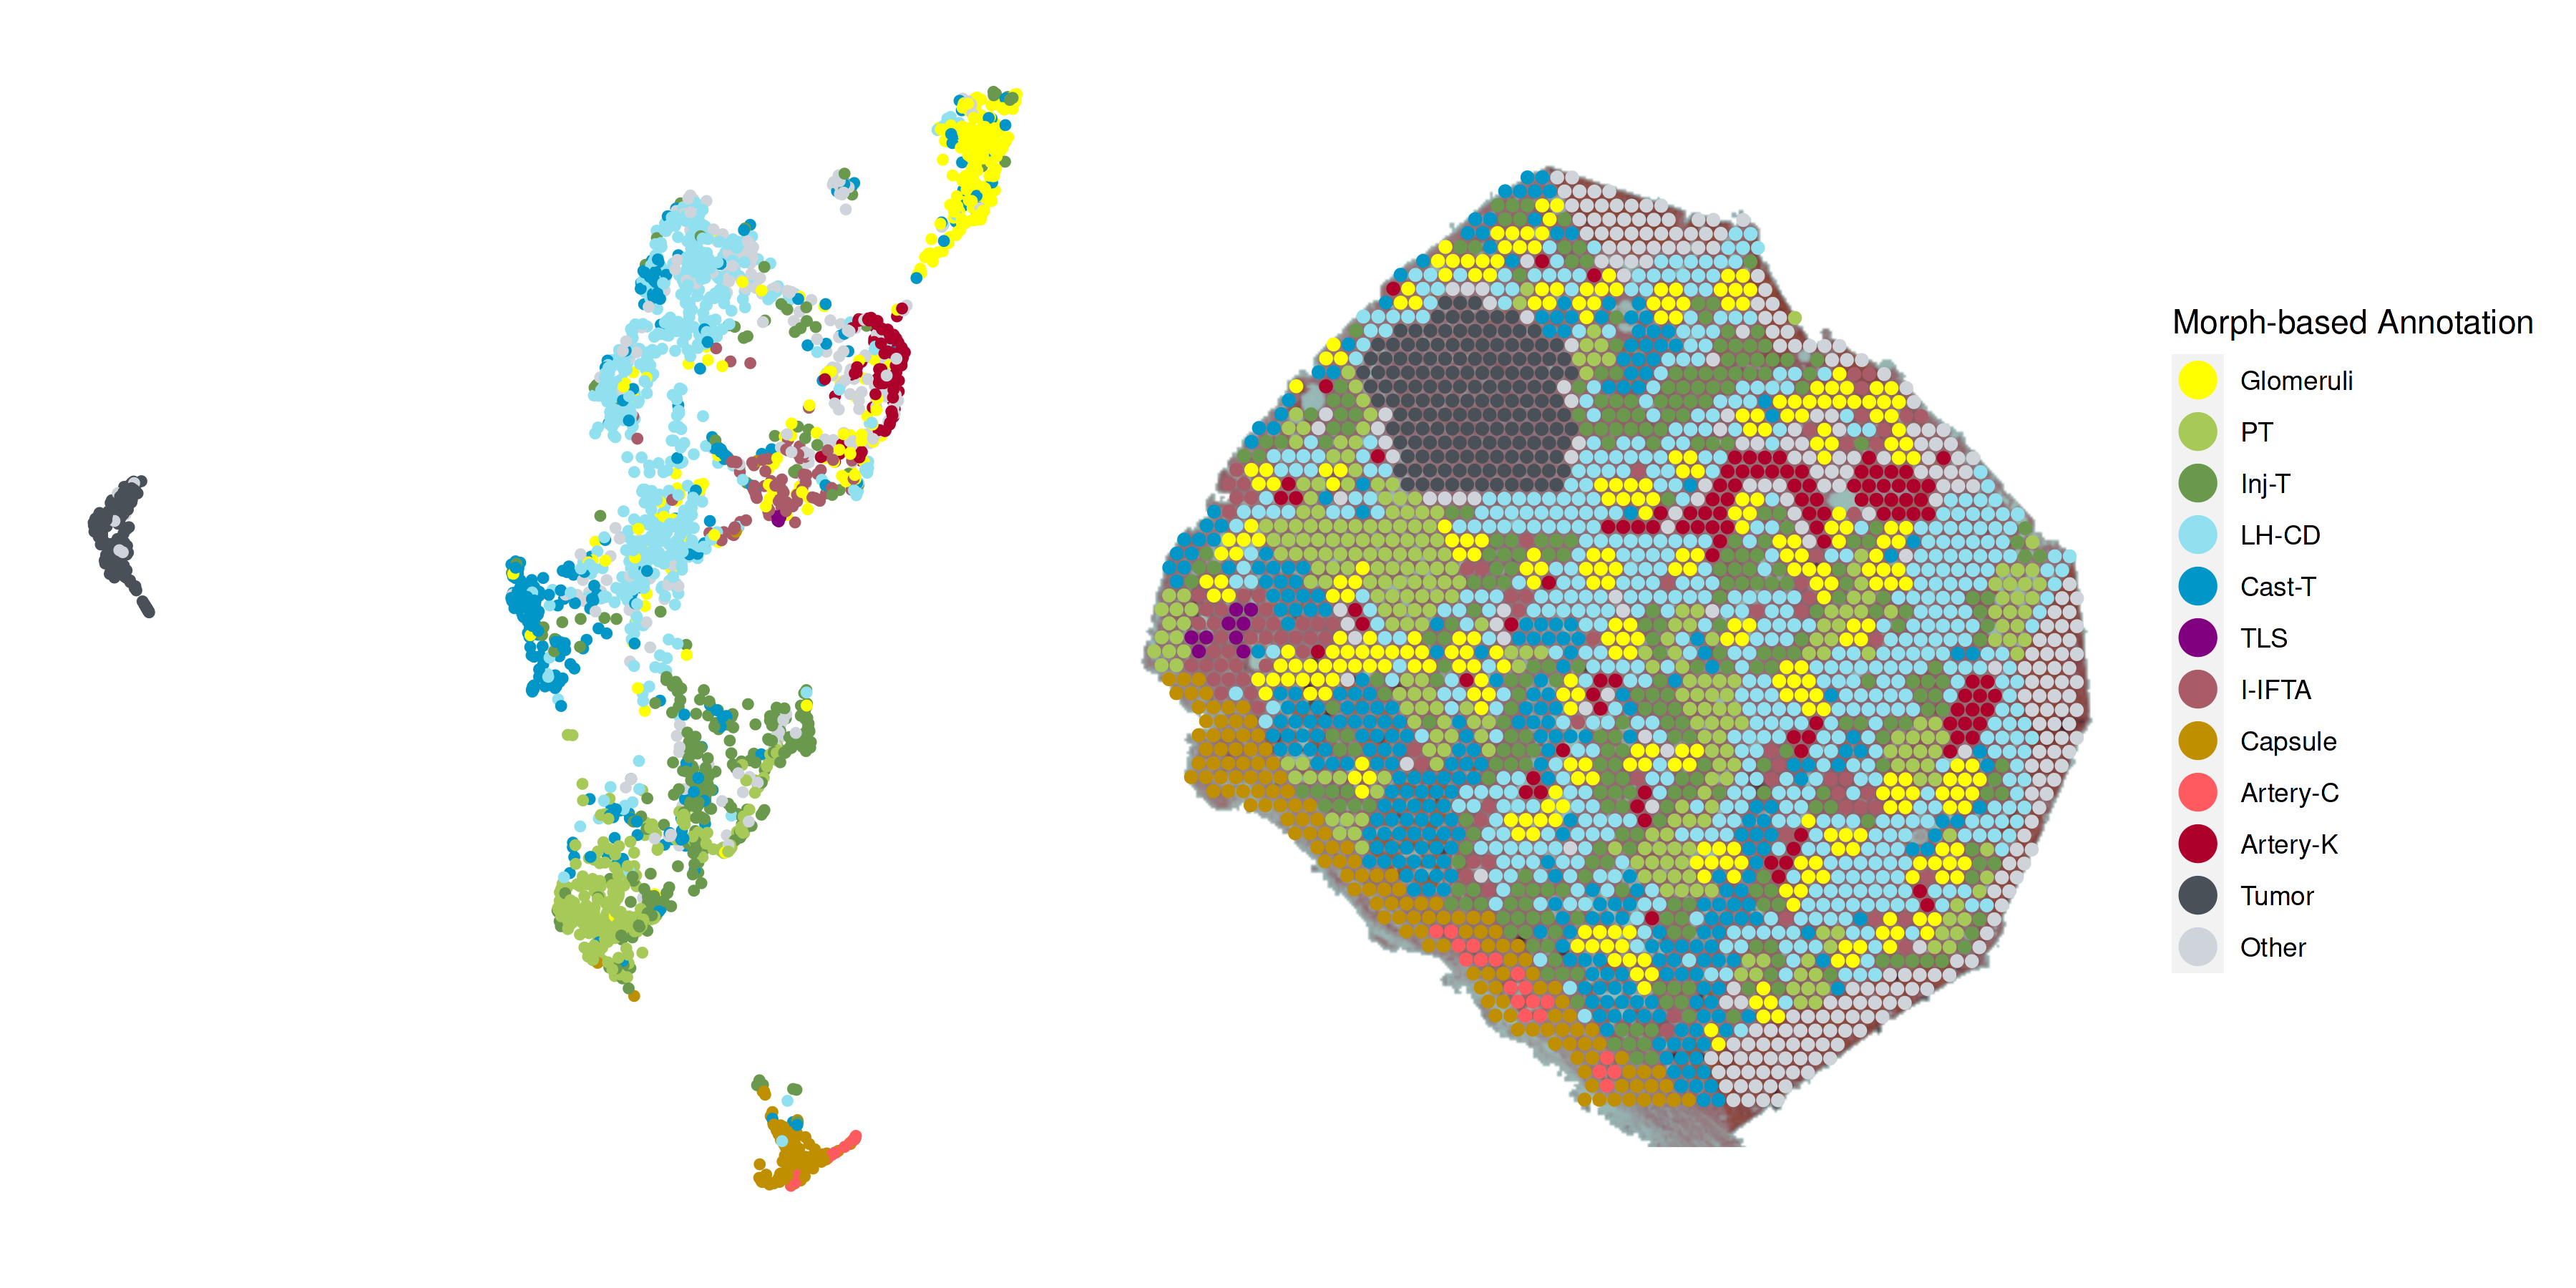

In [17]:
Idents(dkd1) = dkd1$Morph.based

options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)
p1 <- DimPlot(dkd1, reduction = "umap", label = FALSE, cols = color_palette, pt.size = 1) + theme(legend.position = "none")
p1 = p1 + 
     empty_theme +
     custom_theme
# p2 <- SpatialDimPlot(dkd1, label = TRUE, label.size = 3, cols = color_palette)
p2 <- SpatialDimPlot(dkd1, label = FALSE, cols = color_palette, image.alpha = 1, stroke = 0) + 
   guides(fill = guide_legend(override.aes = list(size=6), title="Morph-based Annotation") ) +
    custom_theme
p1 + p2

p2 = p2 + theme(plot.title = element_blank())

ggsave(p2, filename = file.path(plots_path_supp, "spDimPlot_Morph_based.png"), width = 6, height = 5, units = "in", dpi = 300)
ggsave(p2, filename = file.path(plots_path_supp, "spDimPlot_Morph_based.pdf"), width = 6, height = 5, units = "in", dpi = 300)
ggsave(p2, filename = file.path(plots_path_supp, "spDimPlot_Morph_based.svg"), width = 6, height = 5, units = "in", dpi = 300)


### Step 6. DotPlot

In [18]:
Idents(dkd1) <- factor(dkd1$Morph.based , levels = rev(names(color_palette)))

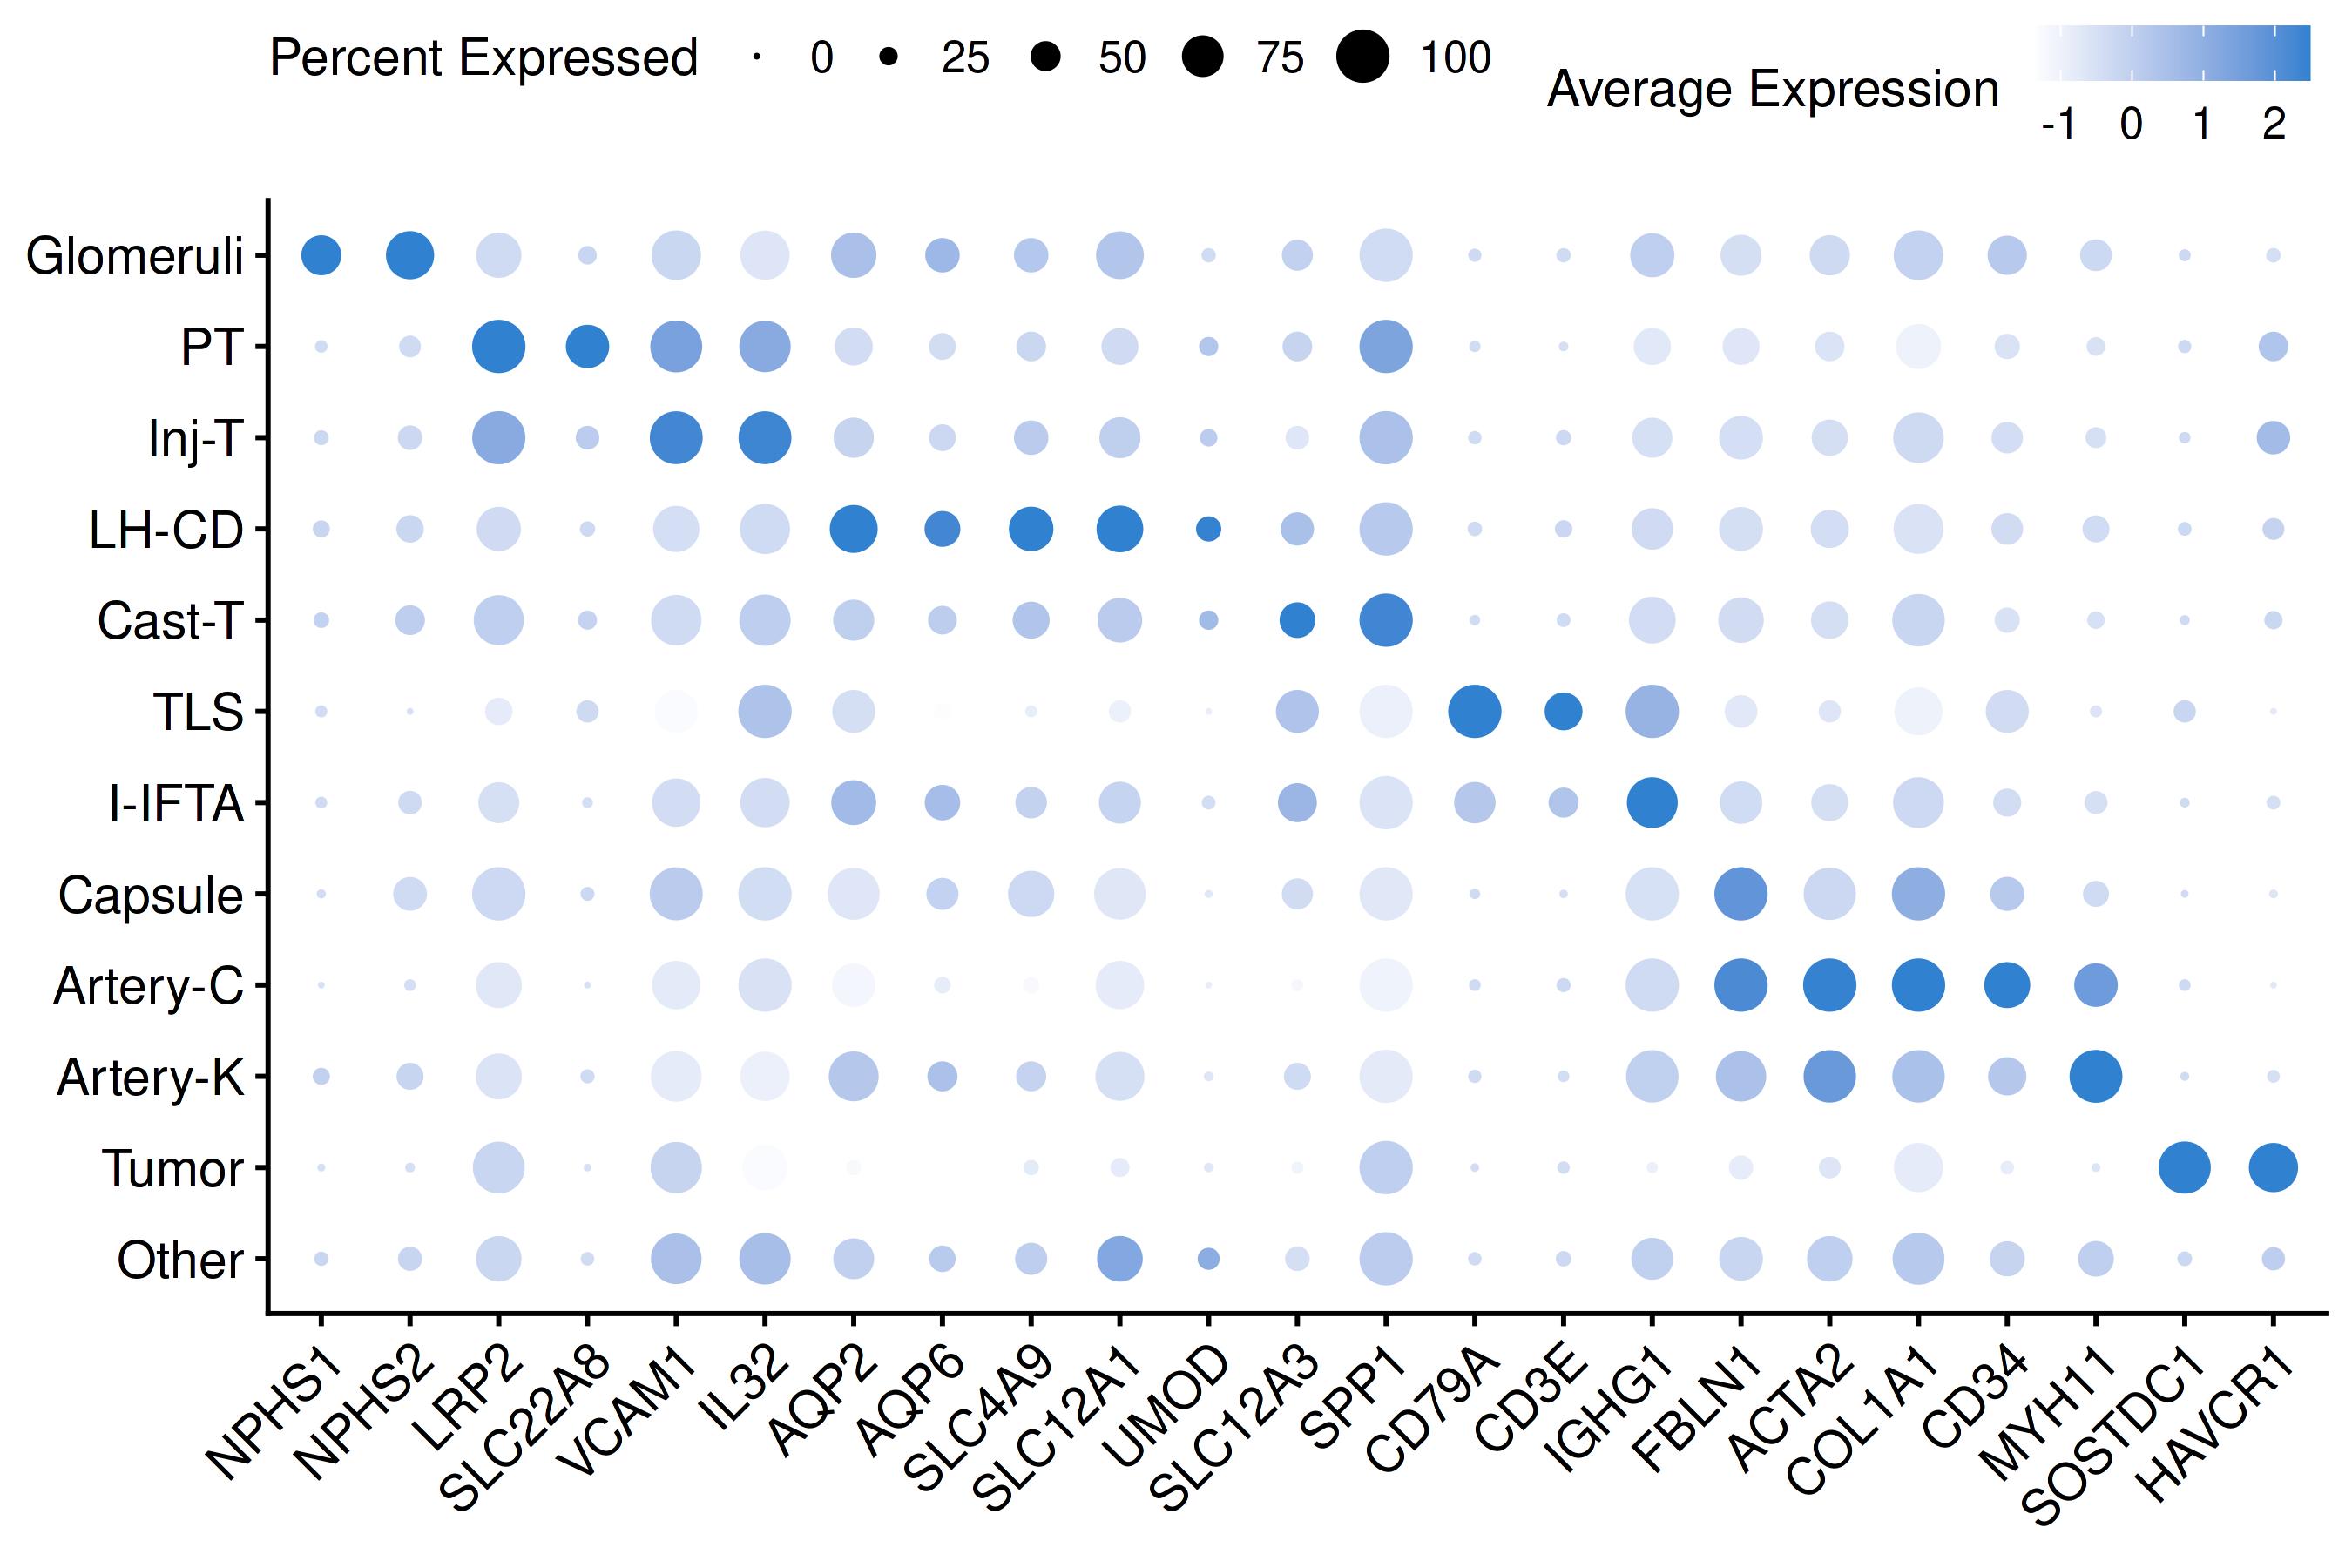

In [20]:
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 300)

feature_genes <- c("NPHS1", "NPHS2",
                   "LRP2", "SLC22A8",
                   "VCAM1", "IL32",
                   "AQP2", "AQP6", "SLC4A9", "SLC12A1", "UMOD", 
                   "SLC12A3", "SPP1", 
                   "CD79A", "CD3E",
                   "IGHG1",
                   "FBLN1", "ACTA2", "COL1A1", "CD34", "MYH11",
                   "SOSTDC1", "HAVCR1"
                  )
p = DotPlot(object = dkd1, features = feature_genes,
           cols = c("white", "#3081D0")) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
     custom_theme + 
    theme(axis.title.x=element_blank(),
         axis.title.y=element_blank(),
          axis.text=element_text(size=14),
         legend.position="top")
p

ggsave(p, filename = file.path(plots_path_main, "DotPlot_Morph_based.png"), width = 9, height = 6, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_main, "DotPlot_Morph_based.pdf"), width = 9, height = 6, units = "in", dpi = 300)


### Step 7. Barplot showing cluster cell number

In [20]:
cluster_num = table(dkd1$Morph.based)
# Convert to data frame
df <- data.frame(name = names(cluster_num), value = as.numeric(cluster_num))
df$name = factor(df$name, levels = rev(names(color_palette)))
df

name      value
1  Glomeruli 345  
2  PT        295  
3  Inj-T     345  
4  LH-CD     649  
5  Cast-T    350  
6  TLS         9  
7  I-IFTA     94  
8  Capsule   138  
9  Artery-C   19  
10 Artery-K  108  
11 Tumor     158  
12 Other     292

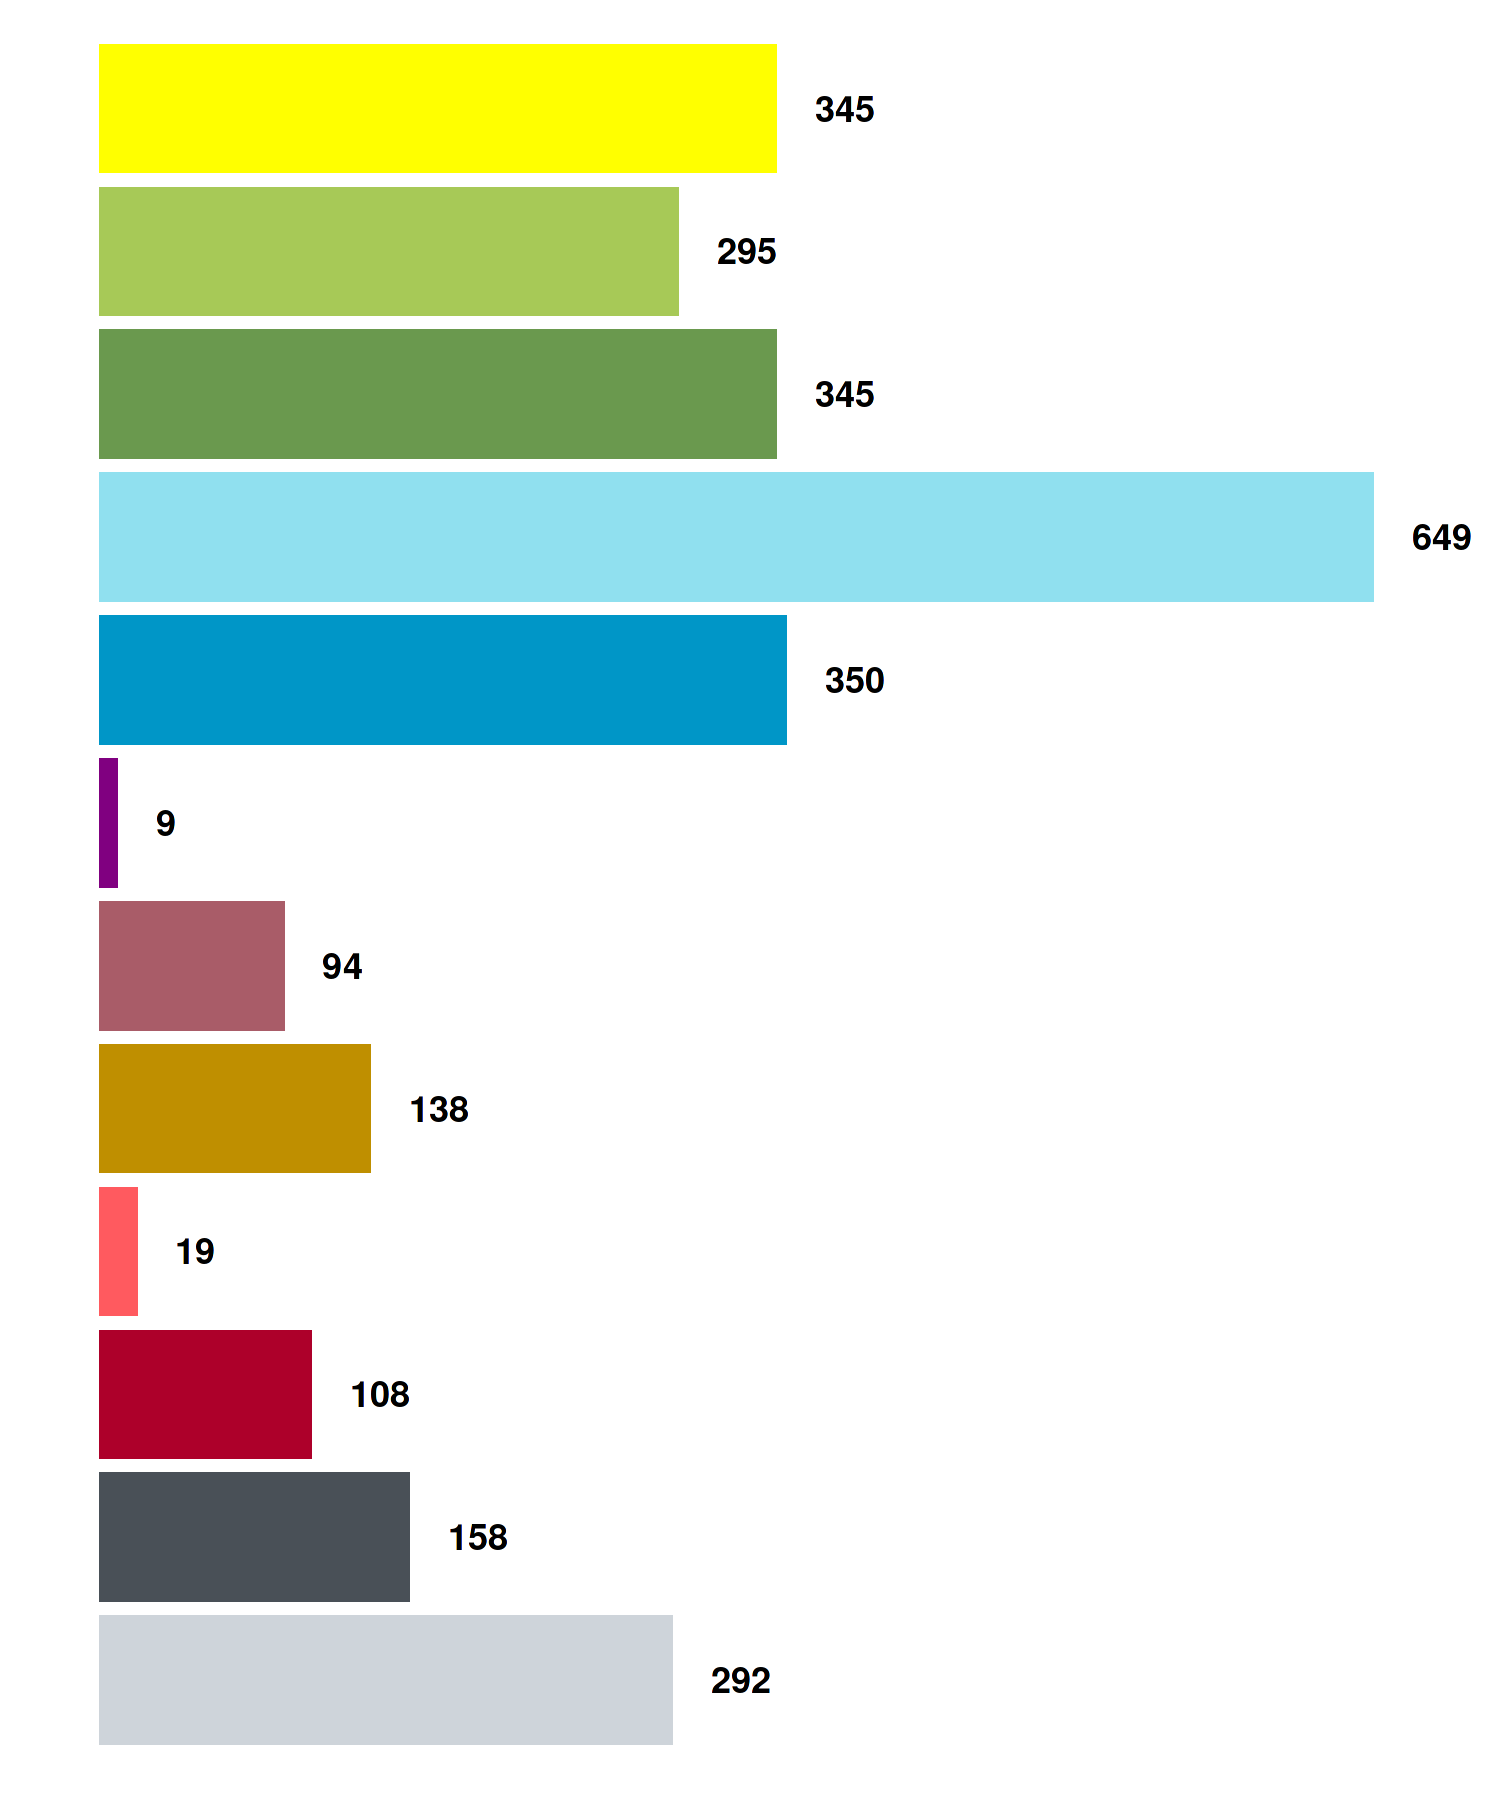

In [21]:
options(repr.plot.width = 5, repr.plot.height = 6, repr.plot.res = 300)

p <- ggplot(df, aes(x = name, y = value, fill = name)) +
    geom_bar(stat = "identity") +
    geom_text(aes(label = value, y = value + max(value) * 0.03), hjust = 0, fontface = "bold", size = 3) +  # Adjust text position
    scale_fill_manual(values = color_palette) +
    coord_flip() +  # Make bars horizontal
    theme_minimal() + 
    custom_theme +
    empty_theme +
    theme(
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank(),  # Remove minor grid lines
        panel.background = element_blank(),   # Remove panel background
        legend.position = "none"  
    )

# Display the plot
p

ggsave(p, filename = file.path(plots_path_main, "BarPlot_Morph_based.png"), width = 5, height = 6, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_main, "BarPlot_Morph_based.pdf"), width = 5, height = 6, units = "in", dpi = 300)


p <- ggplot(df, aes(x = name, y = value, fill = name)) +
    geom_bar(stat = "identity") +
#     geom_text(aes(label = value, y = value + max(value) * 0.03), hjust = 0, fontface = "bold", size = 3) +  # Adjust text position
    scale_fill_manual(values = color_palette) +
    coord_flip() +  # Make bars horizontal
    theme_minimal() + 
    custom_theme +
    empty_theme +
    theme(
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank(),  # Remove minor grid lines
        panel.background = element_blank(),   # Remove panel background
        legend.position = "none"  
    )

ggsave(p, filename = file.path(plots_path_main, "BarPlot_Morph_based_wo_number.png"), width = 2, height = 6, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_main, "BarPlot_Morph_based_wo_number.pdf"), width = 2, height = 6, units = "in", dpi = 300)


### Step 8. Generate QC plots

In [22]:
Idents(dkd1) <- factor(dkd1$Morph.based , levels = (names(color_palette)))

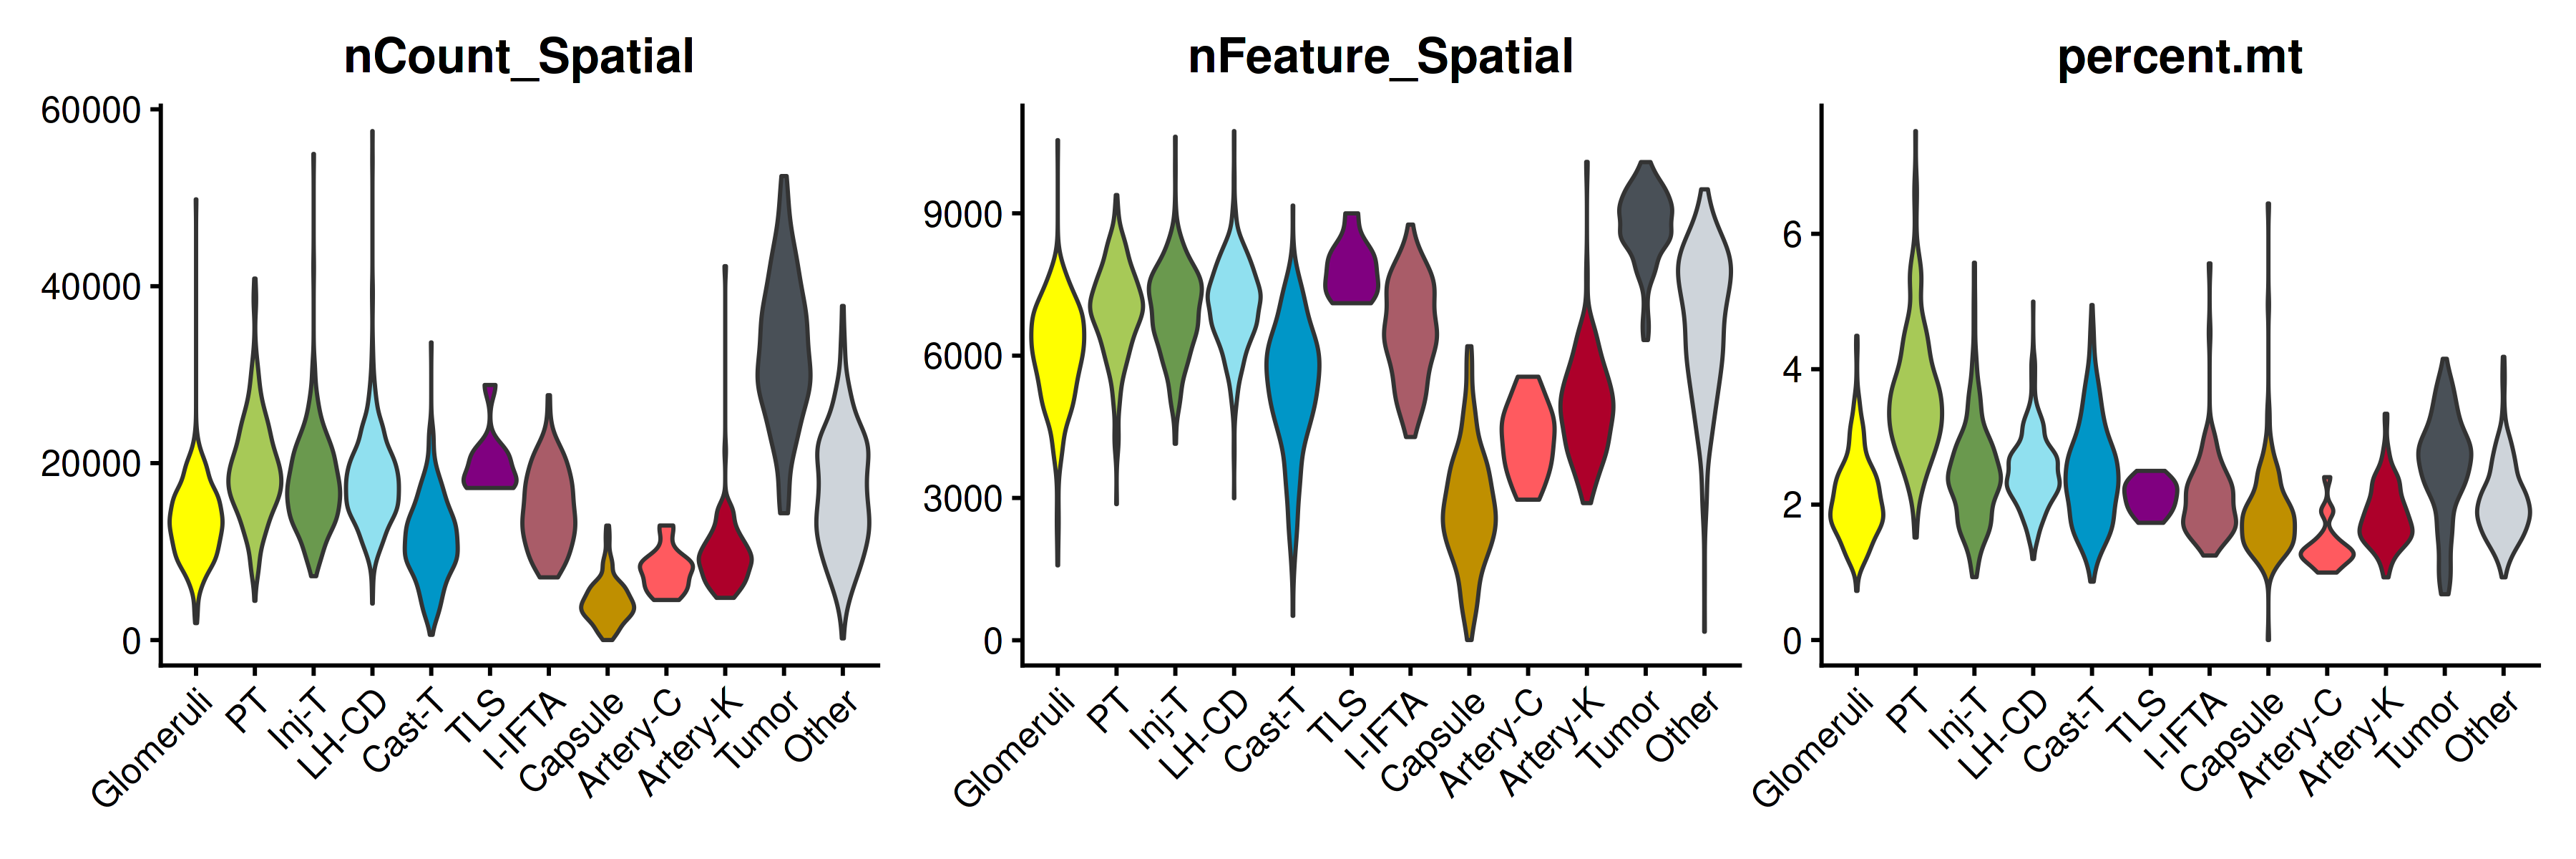

In [23]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 300)


p1 = VlnPlot(object = dkd1, features = c("nCount_Spatial"), pt.size = 0, cols = color_palette) + 
theme(axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position = "none" ) + 
    custom_theme

p2 = VlnPlot(object = dkd1, features = c("nFeature_Spatial"), pt.size = 0, cols = color_palette) + 
theme(axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position = "none" ) + 
    custom_theme

p3 = VlnPlot(object = dkd1, features = c("percent.mt"), pt.size = 0, cols = color_palette) + 
theme(axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position = "none" ) + 
    custom_theme


p = p1 | p2 | p3
p

ggsave(p, filename = file.path(plots_path_supp, "VlnPlot_Morph_based_qc.png"), width = 12, height = 4, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_supp, "VlnPlot_Morph_based_qc.pdf"), width = 12, height = 4, units = "in", dpi = 300)


In [24]:
Idents(dkd1) = dkd1$orig.ident

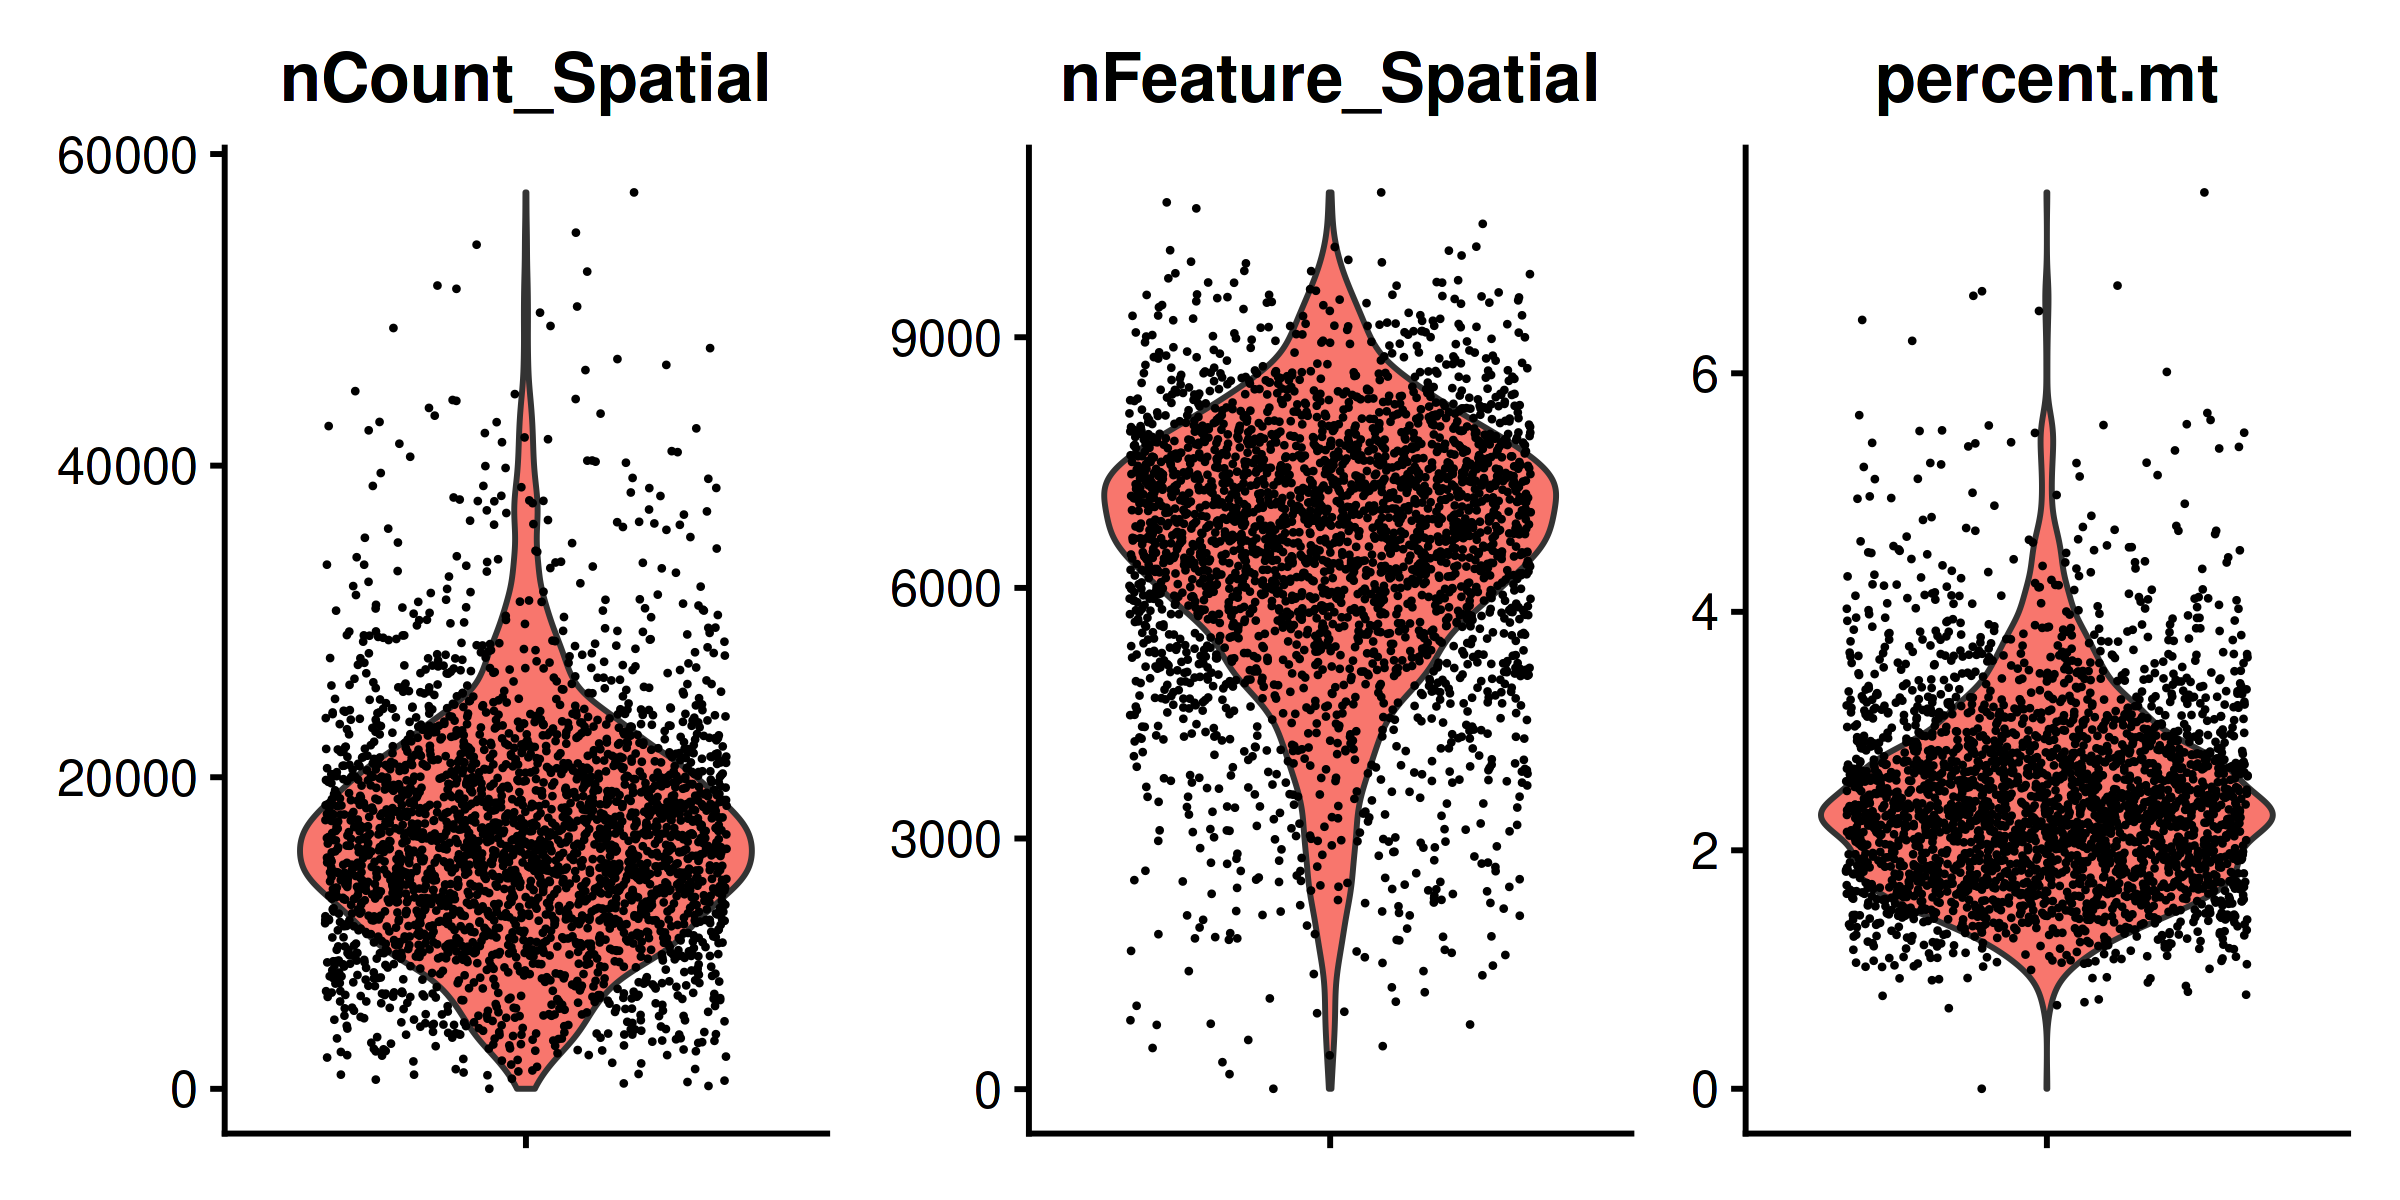

In [25]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)


p1 = VlnPlot(object = dkd1, features = c("nCount_Spatial"), pt.size = 0.1) + 
    theme(axis.text.x=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          legend.position = "none" ) + 
          custom_theme
    
p2 = VlnPlot(object = dkd1, features = c("nFeature_Spatial"), pt.size = 0.1) + 
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.title.y=element_blank(),
          legend.position = "none" ) + 
          custom_theme

p3 = VlnPlot(object = dkd1, features = c("percent.mt"), pt.size = 0.1) + 
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.title.y=element_blank(),
          legend.position = "none" ) + 
          custom_theme

p = p1 | p2 | p3
p

ggsave(p, filename = file.path(plots_path_supp, "VlnPlot_qc.png"), width = 6, height = 4, units = "in", dpi = 300)
ggsave(p, filename = file.path(plots_path_supp, "VlnPlot_qc.pdf"), width = 6, height = 4, units = "in", dpi = 300)


### Step 9. Export nCount_Spatial and nFeature_Spatial for CellScopes Visualization purposes

In [26]:
df = data.frame(Barcode = colnames(dkd1), nCount_Spatial = dkd1$nCount_Spatial)
head(df)

write.csv(df, file = "../../meta/qc_nCount_Spatial.csv", row.names = FALSE)

Barcode            nCount_Spatial
AACACTTGGCAAGGAA-1 AACACTTGGCAAGGAA-1 37726         
AACAGGATTCATAGTT-1 AACAGGATTCATAGTT-1 15426         
AACAGGTTATTGCACC-1 AACAGGTTATTGCACC-1 19244         
AACAGGTTCACCGAAG-1 AACAGGTTCACCGAAG-1 24380         
AACAGTCAGGCTCCGC-1 AACAGTCAGGCTCCGC-1 22432         
AACATCTTAAGGCTCA-1 AACATCTTAAGGCTCA-1 18935

In [27]:
df = data.frame(Barcode = colnames(dkd1), nFeature_Spatial = dkd1$nFeature_Spatial)
head(df)

write.csv(df, file = "../../meta/qc_nFeature_Spatial.csv", row.names = FALSE)

Barcode            nFeature_Spatial
AACACTTGGCAAGGAA-1 AACACTTGGCAAGGAA-1 9197            
AACAGGATTCATAGTT-1 AACAGGATTCATAGTT-1 6541            
AACAGGTTATTGCACC-1 AACAGGTTATTGCACC-1 7267            
AACAGGTTCACCGAAG-1 AACAGGTTCACCGAAG-1 8180            
AACAGTCAGGCTCCGC-1 AACAGTCAGGCTCCGC-1 8043            
AACATCTTAAGGCTCA-1 AACATCTTAAGGCTCA-1 7598

### Step 10. Generate spatial dimplot for nCount_Spatial and nFeature_Spatial

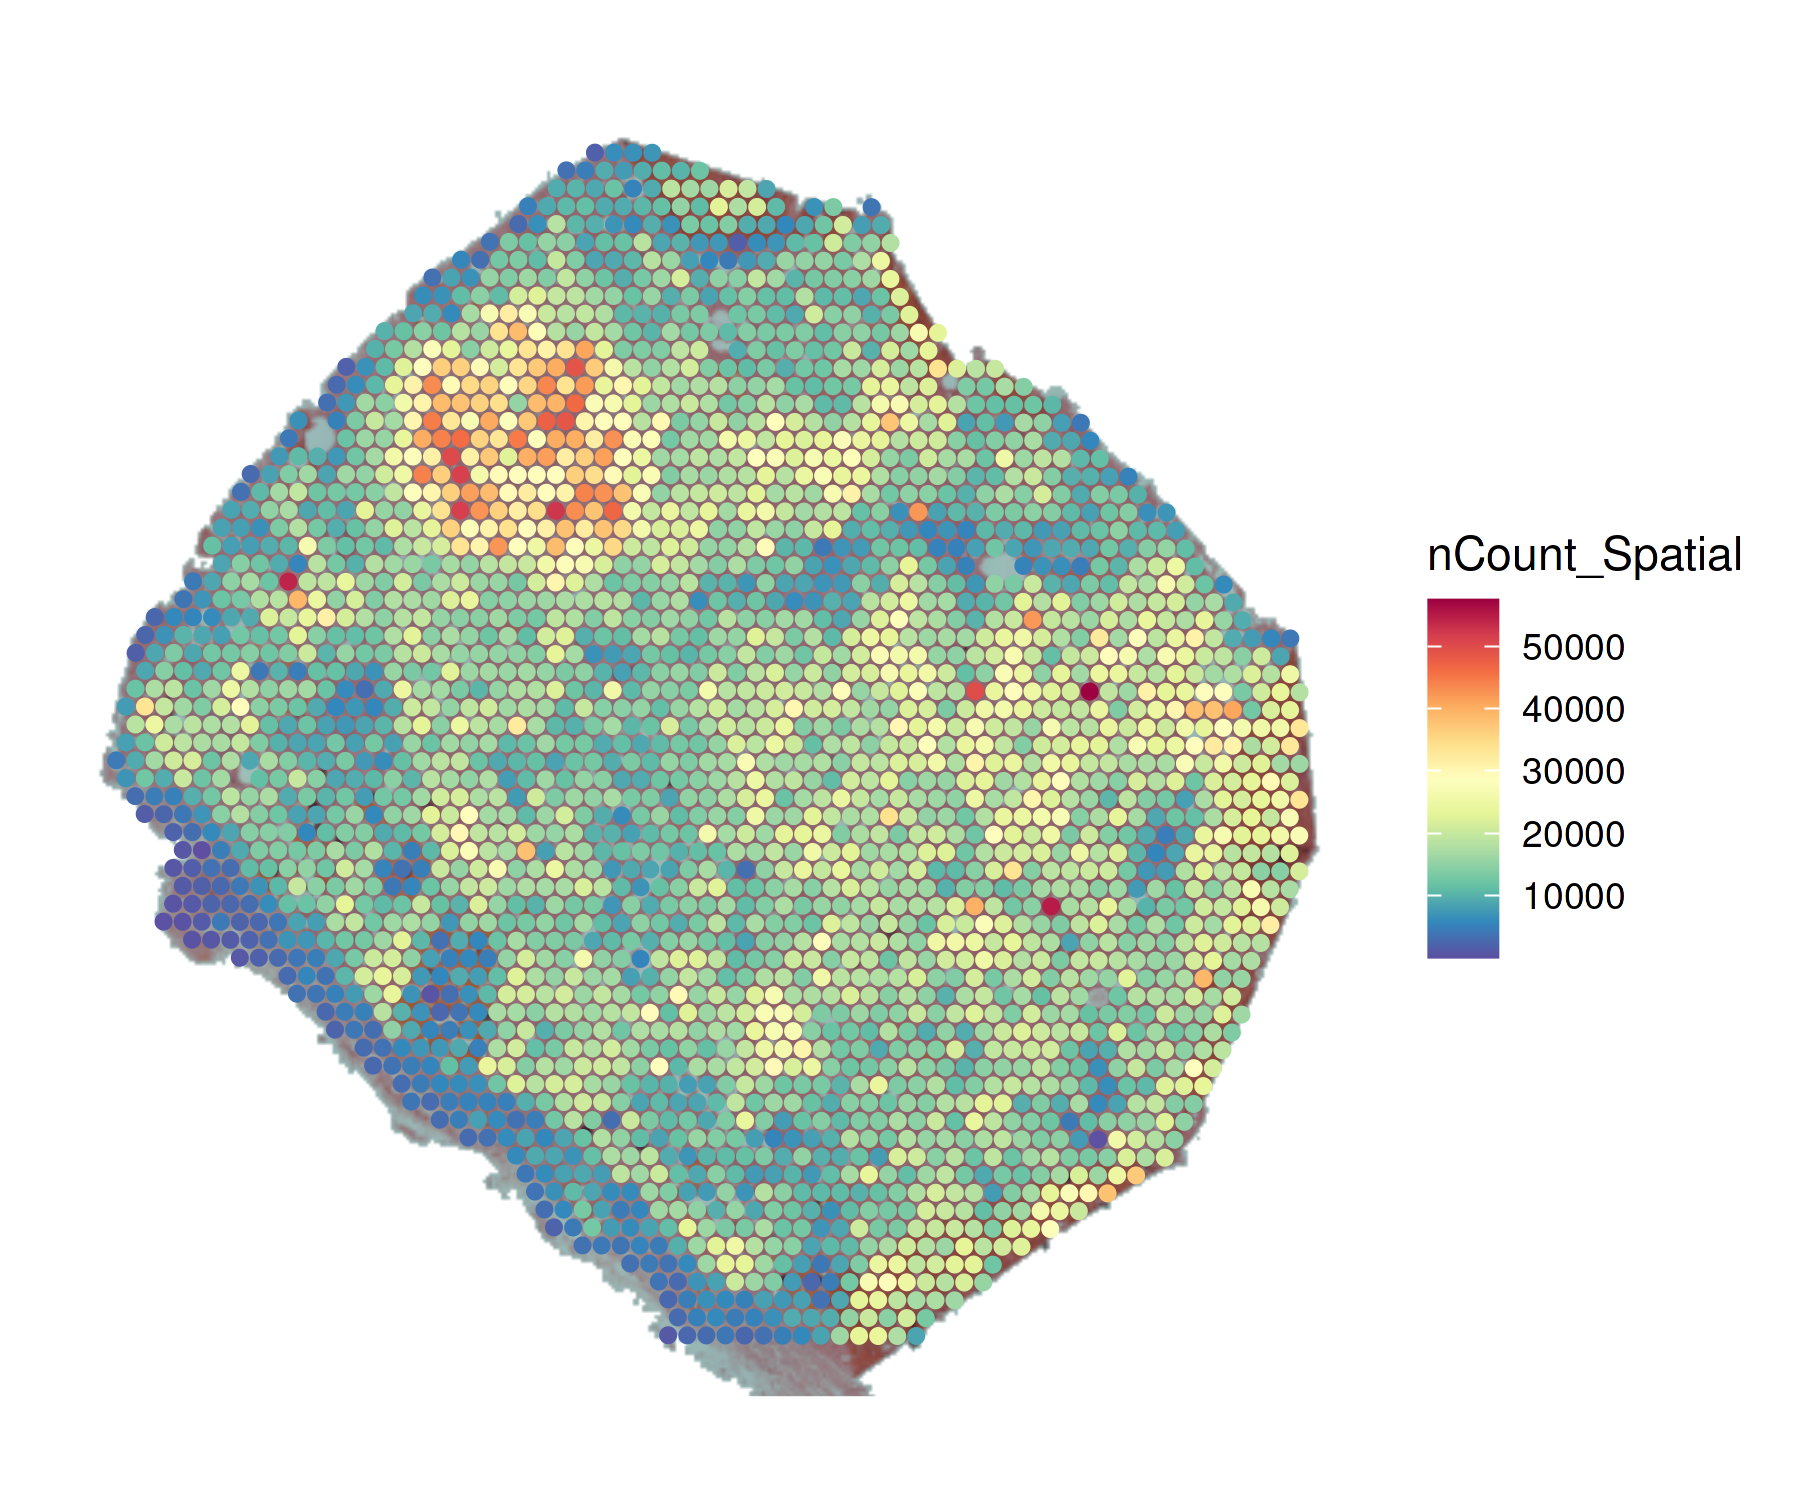

In [28]:
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 300)

p <- SpatialFeaturePlot(dkd1, features = c("nCount_Spatial"), stroke = 0) + 
#    guides(fill = guide_legend(override.aes = list(size=6), title="nCount_Spatial") ) +
    custom_theme + 
    theme(plot.title = element_blank(),
         legend.position = "right")

p

In [29]:
feature_list = c("nCount_Spatial", "nFeature_Spatial", "percent.mt")

for (feature_single in feature_list){
    p <- SpatialFeaturePlot(dkd1, features = feature_single, stroke = 0) + 
#    guides(fill = guide_legend(override.aes = list(size=6), title="nCount_Spatial") ) +
    custom_theme + 
    theme(plot.title = element_blank(),
         legend.position = "right")
    
    ggsave(p, filename = file.path(plots_path_supp, paste0("spFeaturePlot_Morph_based_",feature_single,".png")), width = 6, height = 5, units = "in", dpi = 300)
    ggsave(p, filename = file.path(plots_path_supp, paste0("spFeaturePlot_Morph_based_",feature_single,".pdf")), width = 6, height = 5, units = "in", dpi = 300)
    ggsave(p, filename = file.path(plots_path_supp, paste0("spFeaturePlot_Morph_based_",feature_single,".svg")), width = 6, height = 5, units = "in", dpi = 300)
 
}

### Step 11. FindAllMarkers for each Morph-based cluster vs. all others

In [31]:
Idents(dkd1) = dkd1$Morph.based

In [32]:
df_markers <- FindAllMarkers(dkd1, only.pos = TRUE, min.pct = 0.1, return.thresh = 0.05)

Calculating cluster Glomeruli

Calculating cluster PT

Calculating cluster Inj-T

Calculating cluster LH-CD

Calculating cluster Cast-T

Calculating cluster TLS

Calculating cluster I-IFTA

Calculating cluster Capsule

Calculating cluster Artery-C

Calculating cluster Artery-K

Calculating cluster Tumor

Calculating cluster Other



In [33]:
write.csv(df_markers, file = file.path(processed_data_path, "FindMarkers", "markers_dkd1_morph_based.csv"), row.names=F)

In [36]:
# Load the function
library("gplots")
library("clusterProfiler")
library("ComplexHeatmap")
library(org.Hs.eg.db)

In [37]:
# Change genes name to entrezID
Cluster_df = df_markers
cluster_name_list = unique(Cluster_df$cluster)
cluster_name_list

ids_list = lapply(cluster_name_list, FUN = function(x){
  cluster_i <- Cluster_df[Cluster_df$cluster == x, ]
  ids <- bitr(cluster_i$gene, fromType = 'SYMBOL', toType = c('SYMBOL', 'ENTREZID'), OrgDb = 'org.Hs.eg.db')
  ids$ENTREZID
})
names(ids_list) = cluster_name_list

# Enrichment analysis with enrichGO Biological Process (BP)
ck <- compareCluster(geneCluster = ids_list, fun = enrichGO,
                     OrgDb = org.Hs.eg.db,
                     # keytype = 'ENTREZID',
                     ont = 'BP',
                     pAdjustMethod = 'BH',
                     pvalueCutoff = 0.05,
                     qvalueCutoff = 0.1)
ck <- setReadable(ck, OrgDb = org.Hs.eg.db, keyType="ENTREZID")

[1] Glomeruli PT        Inj-T     LH-CD     Cast-T    TLS       I-IFTA   
 [8] Capsule   Artery-C  Artery-K  Tumor     Other    
12 Levels: Glomeruli PT Inj-T LH-CD Cast-T TLS I-IFTA Capsule ... Other

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“0.79% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“1.86% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“0.63% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“0.69% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“1.67% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


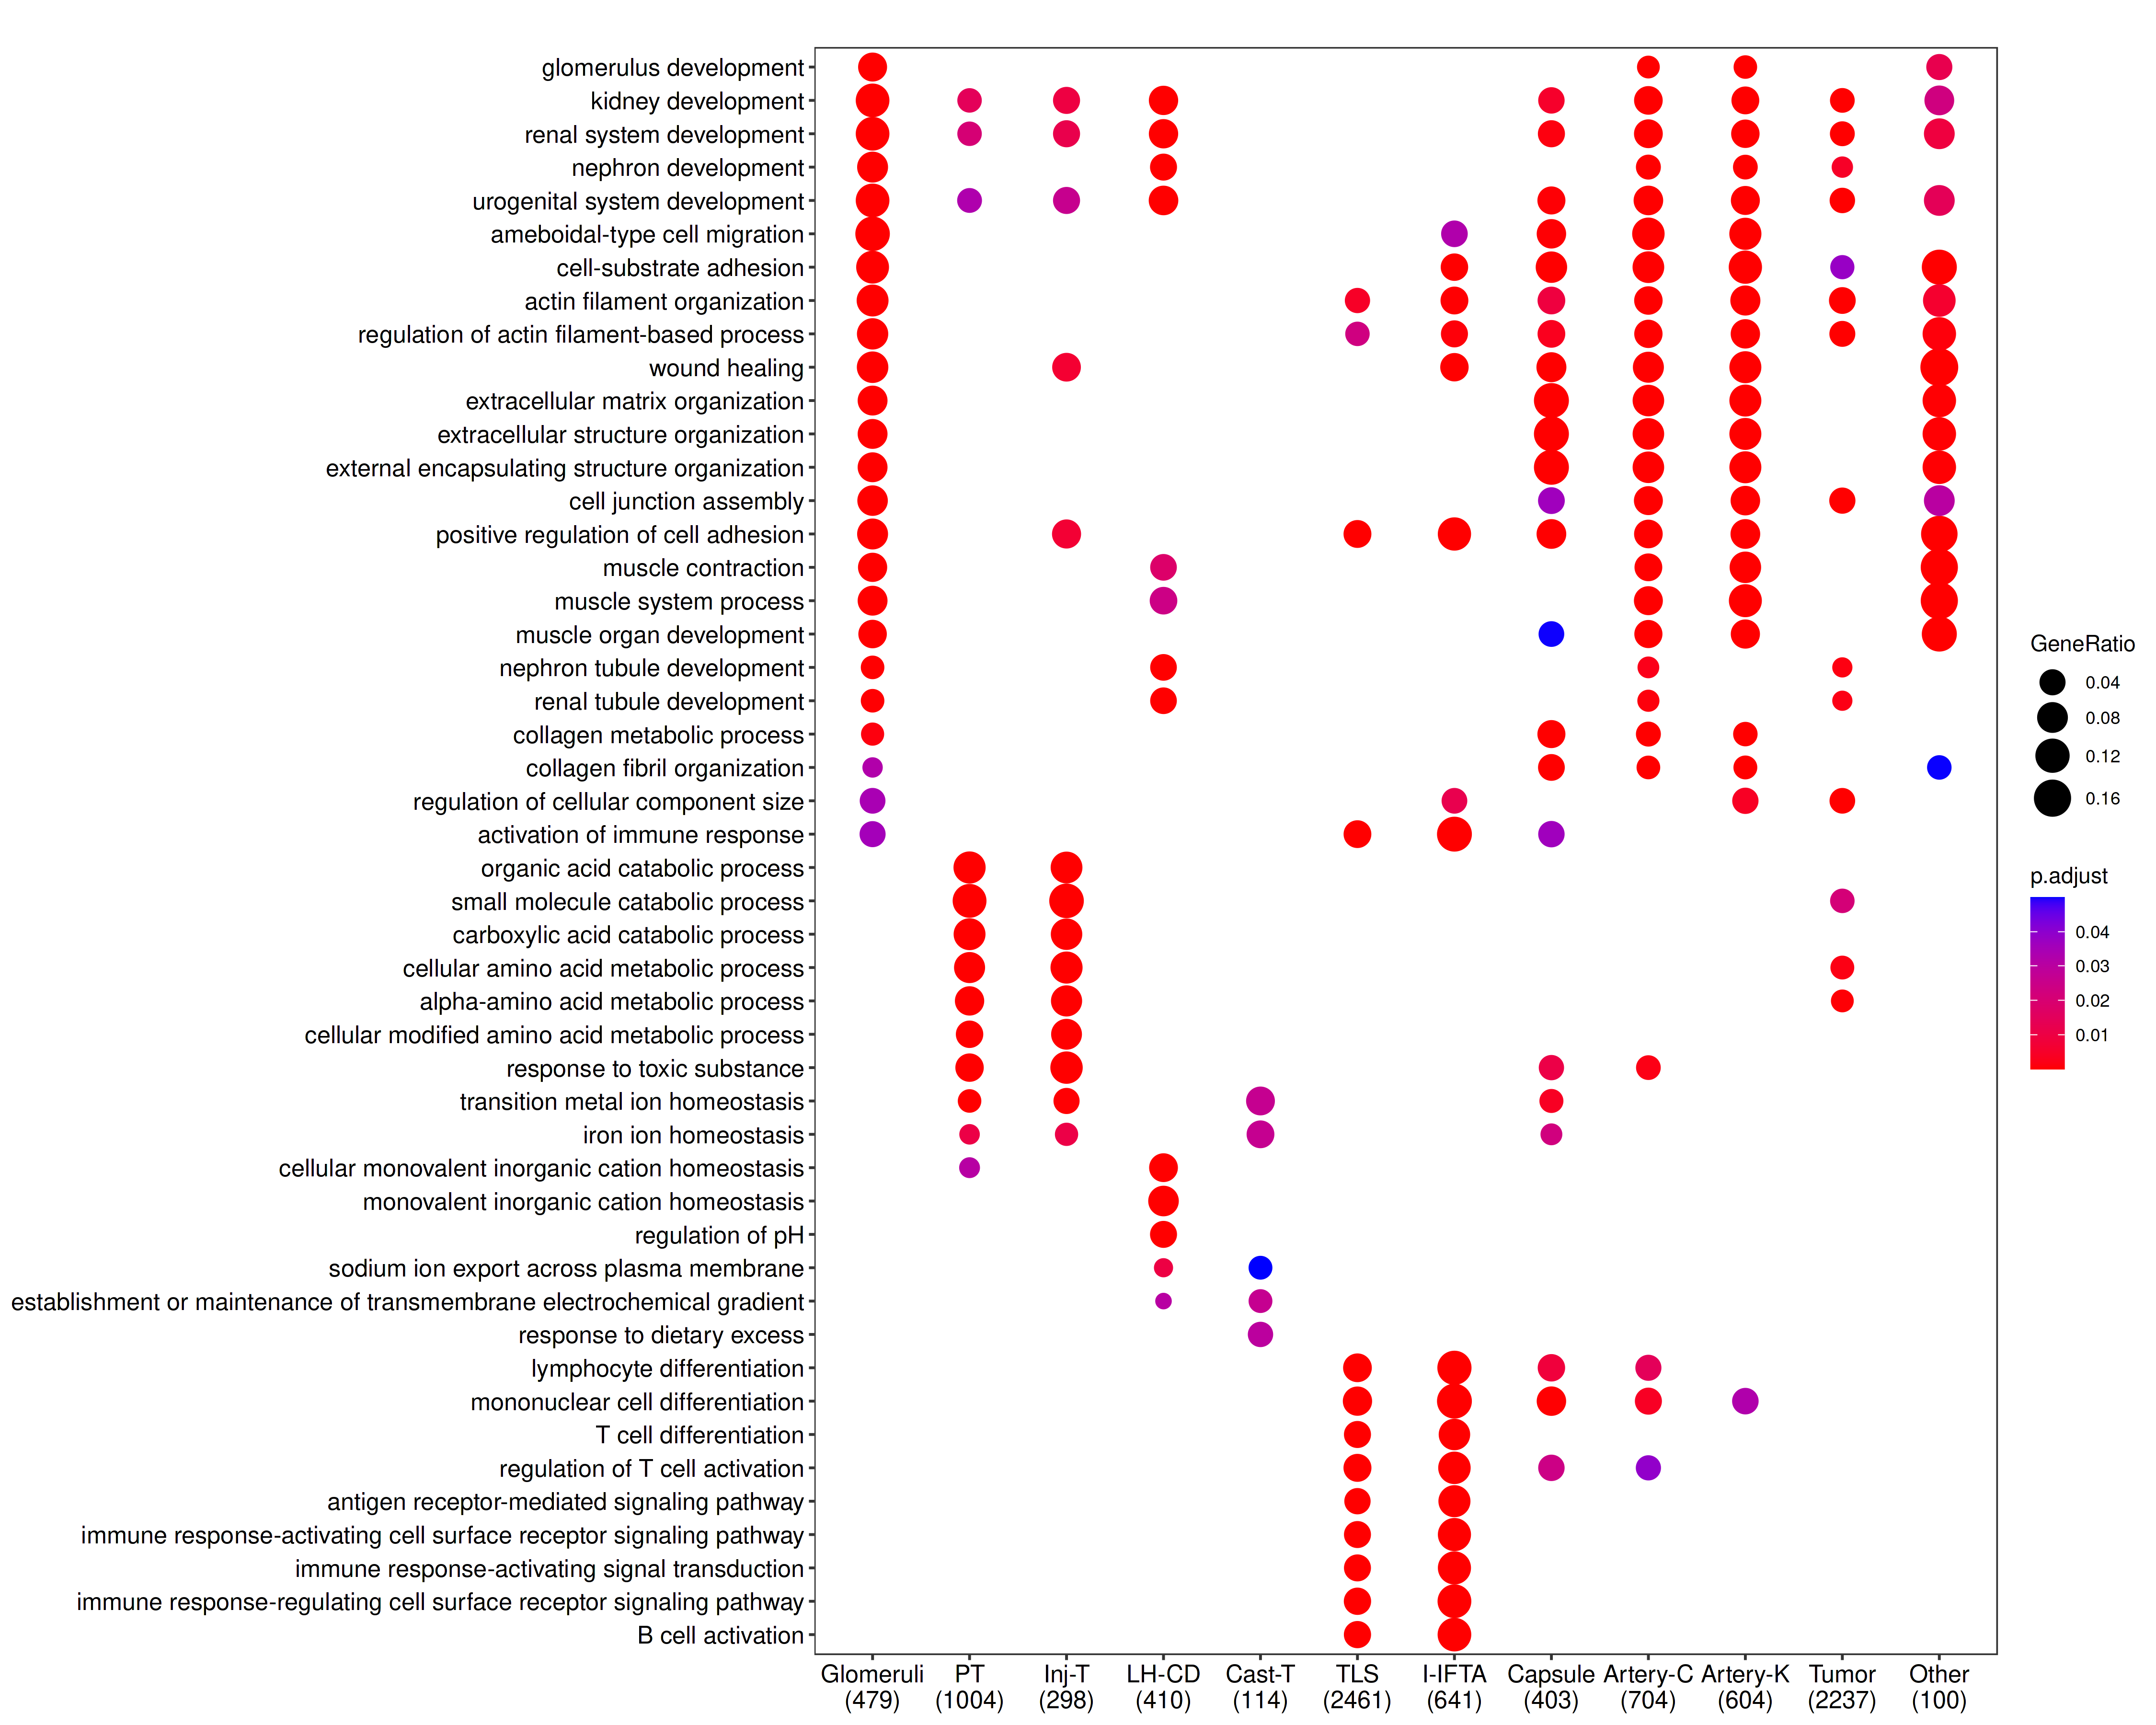

In [41]:
options(repr.plot.width = 15, repr.plot.height = 12, repr.plot.res = 300)
# Plot and visualise the data
p = dotplot(ck)
# adjust the size of y axis labels
library(scales)
p = p + scale_y_discrete(labels = wrap_format(100))
p = p + custom_theme +
#   xlab("Morph-based Glomeruli Subcluster") + 
theme(
    axis.title.x = element_blank(),
#     axis.title.x = element_text(face="bold"), 
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
)
p

ggsave(file.path(plots_path_main, "ORA_DotPlot_dkd1.png"), plot = p, width = 15, height = 12, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "ORA_DotPlot_dkd1.pdf"), plot = p, width = 15, height = 12, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "ORA_DotPlot_dkd1.svg"), plot = p, width = 15, height = 12, units = "in", dpi = 300)

In [12]:
quantile(dkd1$nCount_Spatial)
median(dkd1$nCount_Spatial)
quantile(dkd1$nFeature_Spatial)
median(dkd1$nFeature_Spatial)

0%      25%      50%      75%     100% 
    5.00 11197.00 15591.00 20125.75 57536.00

[1] 15591

0%     25%     50%     75%    100% 
    5.0  5580.0  6647.0  7501.5 10733.0

[1] 6647

In [19]:
dkd1
dkd1@version

An object of class Seurat 
36131 features across 2802 samples within 2 assays 
Active assay: SCT (18046 features, 3000 variable features)
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, umap
 1 image present: slice1

[1] ‘4.1.0’

In [42]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scales_1.2.1          org.Hs.eg.db_3.16.0   AnnotationDbi_1.60.2 
 [4] IRanges_2.32.0        S4Vectors_0.36.2      Biobase_2.52.0       
 [7] BiocGenerics_0.44.0   ComplexHeatmap_2.14.0 clusterProfiler_4.6.2
[10] gplots_3.1.1          resh

In [16]:
dkd1@reductions$pca

PC_ 1 
Positive:  MGP, TAGLN, PTGDS, MYL9, IGFBP5, FN1, TIMP3, ACTA2, DCN, IGKC 
	   TPM2, PODXL, SPARCL1, MYH11, NOTCH3, IGFBP2, NPHS2, IGHG1, A2M, C11orf96 
Negative:  CRYAB, GATM, SLC3A1, SLC17A3, CMBL, AQP1, AMACR, LRP2, SLC17A1, ANPEP 
	   UGT1A9, GLYAT, CLTRN, ALDOB, PDZK1IP1, SLC22A6, HMOX1, SLC47A2, MGST1, FTH1 
PC_ 2 
Positive:  GPX3, ALDOB, SLC22A6, HMOX1, ANK2, UGT1A9, SLC17A3, CMBL, NQO1, MGST1 
	   AKR1B10, SLC13A3, SLC22A8, ENPEP, ABCC2, SLC47A2, SQSTM1, LRP2, FTH1, SLC5A12 
Negative:  CRIP1, PGGHG, ITGB8, ADIRF, MET, C19orf33, AHR, KRT19, CLDN3, FHL1 
	   VCAN, SOSTDC1, MACC1, SPON1, RHEX, ODC1, IRX3, SLC34A2, KRT7, SCARA3 
PC_ 3 
Positive:  MGP, ADIRF, MYL9, VIM, FN1, AQP1, MME, PODXL, IGFBP2, SPOCK1 
	   GPX3, ENPEP, PTGDS, NPHS2, CRYAB, SPARC, PTPRO, TAGLN, TPM2, BGN 
Negative:  WFDC2, LTF, SLPI, HSD11B2, SLC12A1, MUC1, ITM2C, DEFB1, CA12, SFRP1 
	   AQP2, KCNJ1, RASD1, OLFM4, SLC4A9, SPP1, PTGER3, TFCP2L1, MAL, FXYD4 
PC_ 4 
Positive:  MGP, DCN, FBLN1, TAGLN, COL1A2,